In [1]:
%run func.ipynb

In [2]:
import numpy as np
import pandas as pd
import math
from skimage.io import imread
from skimage import io
from skimage.color import rgb2gray
import imageio
import skimage
import cv2
import glob
import os
from matplotlib import pyplot as plt
import mahotas
from pyfeats import *
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
from skimage import io, color, img_as_ubyte
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [3]:
def load_image(arr):
    strr = "gambarsidikjari/*.bmp"
    for file in glob.glob(strr):
        img=cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        arr.append(img)
    return arr

In [4]:
data=[]
data=load_image(data)
print('total image: ',len(data))

total image:  100


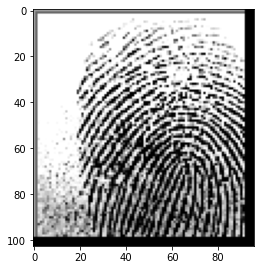

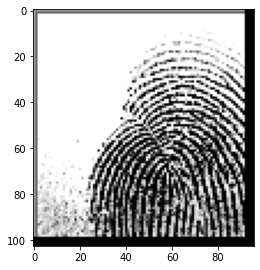

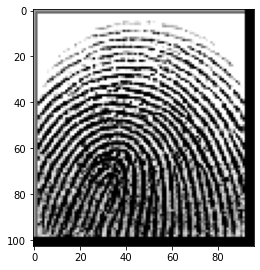

In [5]:
for i, image in enumerate(data):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(4,2,2)
    ax1.imshow(image, cmap=plt.cm.gray)
    if i == 2:
        break

In [6]:
print(data[0])

[[160 160 160 ...   0   0   0]
 [160 105 105 ...   0   0   0]
 [160 105 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [7]:
# get the shape of the array
rows, cols = data[3].shape

# print the length of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", cols)

Number of Rows: 103
Number of Columns: 96


In [8]:
for image in data:
    mask = np.ones(image.shape)

In [9]:
df = feature_extraction(data)

target_list = []
for i in range(20):
  for j in range(5):
    target_list.append(j+1)

df['Target'] = target_list

In [10]:
df.head()

,Mean,Variance,Median,Mode,Skewness,Kurtosis,Energy,EntropyFOS,MinimalGrayLevel,MaximalGrayLevel,...,SumAverage,SumVariance,SumEntropy,EntropyGLCM,DifferenceVariance,DifferenceEntropy,Information1,Information2,MaximalCorrelationCoefficient,Target
Image_1,152.446120,10519.917129,185.0,255.0,-0.448559,1.541112,0.112145,3.886009,0.0,255.0,...,378.961310,17978.482526,7.026904,9.521569,0.000325,6.212765,-0.334840,0.988978,2.093801,1
Image_2,164.632274,10867.792041,220.0,255.0,-0.632901,1.674024,0.185741,3.347604,0.0,255.0,...,405.111014,18233.198107,5.703622,7.471341,0.000813,5.052027,-0.393346,0.986913,2.220650,2
Image_3,127.570227,10963.166831,133.0,0.0,-0.030917,1.332301,0.103204,3.948212,0.0,255.0,...,345.618017,20659.887617,7.440459,10.069340,0.000228,6.597364,-0.342323,0.992020,2.247461,3
Image_4,133.592944,10393.465348,151.0,255.0,-0.142980,1.395373,0.087368,4.130406,0.0,255.0,...,344.503904,19971.467290,7.523537,10.391891,0.000213,6.600903,-0.348631,0.993648,2.251734,4
Image_5,154.199530,10379.337585,189.0,255.0,-0.482152,1.580665,0.107202,3.939134,0.0,255.0,...,376.630395,17469.220331,7.182256,9.766996,0.000279,6.373085,-0.320211,0.987256,2.058490,5


In [11]:
df.to_csv('my_data.csv', index=False)

In [24]:
# Membaca data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scale train sets with StandardScaler
X_std = StandardScaler().fit_transform(X)

# 
X_minmax = MinMaxScaler().fit_transform(X)

# Support Vector Machine - Recursive Feature Elimination

In [51]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Create an SVM object
svm = SVC(kernel="linear", C=1)

# Create an RFE object and set the parameters
rfe = RFE(estimator=svm, n_features_to_select=1)

# Fit the RFE object to the data
rfe.fit(X_std, y)

print(X.columns[rfe.support_])

Index(['Contrast'], dtype='object', name='')


In [52]:
# Create a DataFrame with the feature names and rankings
rankings = pd.DataFrame({'SVM-RFE': X.columns, 'Ranking': rfe.ranking_})

# Sort the DataFrame by the rankings
rankings = rankings.sort_values('Ranking')

# Print the sorted DataFrame
rankings.head(98)

,SVM-RFE,Ranking
17,Contrast,1
27,Information1,2
7,EntropyFOS,3
2,Median,4
22,SumVariance,5
18,Correlation,6
15,HistogramWidth,7
0,Mean,8
29,MaximalCorrelationCoefficient,9
12,25Percentile,10


# Information Gain

In [10]:
from sklearn.feature_selection import mutual_info_classif

scores = mutual_info_classif(X, y)

result_fs = pd.DataFrame({'Inf_Gain': list(X.columns), 'scores': list(scores)})
result_fs = result_fs.sort_values("scores", ascending=False)
result_fs.head(100)

,Inf_Gain,scores
18,Correlation,0.291694
17,Contrast,0.264360
23,SumEntropy,0.181031
6,Energy,0.175346
26,DifferenceEntropy,0.159072
7,EntropyFOS,0.156681
24,EntropyGLCM,0.147358
13,75Percentile,0.131949
2,Median,0.128491
27,Information1,0.127441


# Minimum Redundancy Maximum Relevance (mRMR)

In [64]:
import pandas as pd
from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select

# compute F-statistics and initialize correlation matrix
F = pd.Series(f_regression(X, y)[0], index = X.columns)
corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

# initialize list of selected features and list of excluded features
selected = []
not_selected = X.columns.to_list()

# initialize list of feature scores
scores = []
scores_ith = []

redundancy = []
relevancy = []
# repeat K times
for i in range(10):
    # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
    if i > 0:
        last_selected = selected[-1]
        corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)
        
    # compute FCQ score for all the (currently) excluded features (this is Formula 2)
    score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
    relevancy.append(F.loc[not_selected])
    redundancy.append(corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001))

    scores_ith.append(score)
    # find best feature, add it to selected and remove it from not_selected
    best = score.index[score.argmax()]
    selected.append(best)
    not_selected.remove(best)
    
    # add feature name and score to list of feature scores
    scores.append((best, score[best]))
    
# create DataFrame of feature scores
score_df = pd.DataFrame(scores, columns=['mRMR', 'Highest_score_each_iteration'])

In [65]:
for i in range(len(scores_ith)):
    combines = {'Relevancy':relevancy[i], 'Redundancy':redundancy[i],'MRMR':scores_ith[i]}
    scored_ith = pd.DataFrame(combines)
    scored_ith = scored_ith.sort_values('MRMR', ascending=False)
    print('ITERASI KE ', i+1)
    print(scored_ith)
    print()
    print()

ITERASI KE  1
                               Relevancy  Redundancy          MRMR
                                                                  
Contrast                       15.190449     0.00001  1.519045e+06
Correlation                    11.054915     0.00001  1.105491e+06
DifferenceEntropy               6.557856     0.00001  6.557856e+05
EntropyFOS                      6.535353     0.00001  6.535353e+05
Energy                          6.243083     0.00001  6.243083e+05
InverseDifferenceMoment         6.053728     0.00001  6.053728e+05
SumEntropy                      5.171988     0.00001  5.171988e+05
EntropyGLCM                     5.138155     0.00001  5.138155e+05
Information1                    4.783042     0.00001  4.783042e+05
DifferenceVariance              4.693318     0.00001  4.693318e+05
ASM                             4.454130     0.00001  4.454130e+05
SumAverage                      3.090602     0.00001  3.090602e+05
SumOfSquaresVariance            3.052085     0.0

In [61]:
import pandas as pd
from sklearn.feature_selection import f_regression

# inputs:
#    X: pandas.DataFrame, features
#    y: pandas.Series, target variable
#    K: number of features to select
def min_redun_max_relev(X, y, k):
    # compute F-statistics and initialize correlation matrix
    F = pd.Series(f_regression(X, y)[0], index = X.columns)
    corr = pd.DataFrame(.00001, index = X.columns, columns = X.columns)

    # initialize list of selected features and list of excluded features
    selected = []
    not_selected = X.columns.to_list()

    # initialize list of feature scores
    scores = []
    scores_ith = []

    redundancy = []
    relevancy = []
    # repeat K times
    for i in range(k):
        # compute (absolute) correlations between the last selected feature and all the (currently) excluded features
        if i > 0:
            last_selected = selected[-1]
            corr.loc[not_selected, last_selected] = X[not_selected].corrwith(X[last_selected]).abs().clip(.00001)

        # compute FCQ score for all the (currently) excluded features (this is Formula 2)
        score = F.loc[not_selected] / corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001)
        relevancy.append(F.loc[not_selected])
        redundancy.append(corr.loc[not_selected, selected].mean(axis = 1).fillna(.00001))

        scores_ith.append(score)
        # find best feature, add it to selected and remove it from not_selected
        best = score.index[score.argmax()]
        selected.append(best)
        not_selected.remove(best)

        # add feature name and score to list of feature scores
        scores.append((best, score[best]))
    return scores,selected
    

In [100]:
selected_each_k = {}
for k in range(1,11):
    scores, selected = min_redun_max_relev(X, y, k)
    selected_each_k[f'k = {k}'] = selected

In [101]:
# Find the maximum number of values across all keys
max_values = max([len(val) if isinstance(val, list) else 1 for val in selected_each_k.values()])

# Iterate through the keys and add "n/a" values as necessary
for key, val in selected_each_k.items():
    # Check if the value is a string and split by comma if necessary
    if isinstance(val, str):
        values = val.split(',')
    else:
        values = val
        
    # If the number of values is less than the maximum, add "n/a" values
    num_values = len(values)
    if num_values < max_values:
        diff = max_values - num_values
        values += ['-'] * diff
    
    # Join the values with commas and update the dictionary
    selected_each_k[key] = values
    
selected_each_k_df = pd.DataFrame(selected_each_k)
selected_each_k_df.head(100)

,k = 1,k = 2,k = 3,k = 4,k = 5,k = 6,k = 7,k = 8,k = 9,k = 10
0,Contrast,Contrast,Contrast,Contrast,Contrast,Contrast,Contrast,Contrast,Contrast,Contrast
1,-,Correlation,Correlation,Correlation,Correlation,Correlation,Correlation,Correlation,Correlation,Correlation
2,-,-,EntropyFOS,EntropyFOS,EntropyFOS,EntropyFOS,EntropyFOS,EntropyFOS,EntropyFOS,EntropyFOS
3,-,-,-,90Percentile,90Percentile,90Percentile,90Percentile,90Percentile,90Percentile,90Percentile
4,-,-,-,-,Energy,Energy,Energy,Energy,Energy,Energy
5,-,-,-,-,-,DifferenceEntropy,DifferenceEntropy,DifferenceEntropy,DifferenceEntropy,DifferenceEntropy
6,-,-,-,-,-,-,InverseDifferenceMoment,InverseDifferenceMoment,InverseDifferenceMoment,InverseDifferenceMoment
7,-,-,-,-,-,-,-,Information1,Information1,Information1
8,-,-,-,-,-,-,-,-,EntropyGLCM,EntropyGLCM
9,-,-,-,-,-,-,-,-,-,MaximalCorrelationCoefficient


# Chi Square

In [14]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X_minmax, y)

# higher the chi value, higher the importance
result_chi = pd.DataFrame({'Chi_Square': list(X.columns), 'scores': list(chi_scores[0])})
result_chi = result_chi.sort_values("scores", ascending=False)
result_chi.head(100)

,Chi_Square,scores
12,25Percentile,3.628734
18,Correlation,3.493599
25,DifferenceVariance,3.296891
16,ASM,3.162253
17,Contrast,2.848165
20,InverseDifferenceMoment,2.830768
3,Mode,2.155844
26,DifferenceEntropy,1.486471
5,Kurtosis,1.308447
23,SumEntropy,1.248928


# ReliefF

In [ ]:
import sklearn_relief as relief

# Load some data and put it in a numpy.array matrix
my_input_matrix = np.array(X)

# Load the label vector
my_label_vector = np.array(y)

r = relief.Relief(
    n_features=3 # Choose the best 3 features
) # Will run by default on all processors concurrently

my_transformed_matrix = r.fit_transform(
    my_input_matrix,
    my_label_vector
)

In [ ]:
# Create a DataFrame with the feature names and rankings
results = pd.DataFrame({'ReliefF': X.columns, 'Weights': r.w_})

# Sort the DataFrame by the rankings
results = results.sort_values('Weights', ascending=False)

# Print the sorted DataFrame
results.head(98)

In [ ]:
ig_rank = result_fs['Inf_Gain'].tolist()
mrmr_rank = score_df['mRMR'].tolist()
chi2_rank = result_chi['Chi_Square'].tolist()
svmrfe_rank = rankings['SVM-RFE'].tolist()
relieff_rank = results['ReliefF'].tolist()

In [ ]:
combines = {'Information Gain':ig_rank, 'Chi Square':chi2_rank, 'mRMR':mrmr_rank, 'ReliefF':relieff_rank, 'SVM-RFE':svmrfe_rank}

In [ ]:
combined_df = pd.DataFrame(combines)
combined_df.head(100)